In [43]:
# Import 

import pandas as pd
import joblib
import os
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [44]:
# Load Data

df = pd.read_csv("train_dataset.csv")

In [45]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [47]:
# Cek NULL values

df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [48]:
# Cek duplicated values

df.duplicated().sum()

0

In [49]:
# Drop kolom Id karena tidak penting

df.drop(columns=["id"], inplace=True, errors="ignore")

In [50]:
# Menentukan kolom target

y = df["satisfaction"]
X = df.drop(columns = ["satisfaction"])   

In [51]:
# Identifikasi fitur untuk mempermudah Preprocessing

categorical_cols = X.select_dtypes(include = ["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include = ["int64", "float64"]).columns.tolist()

In [52]:
# Preprocessing numerik

numeric_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler())
    ]
)

In [53]:
# Preprocessing kategorikal

categorical_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown = "ignore"))
    ] 
)

In [54]:
# Gabung kedua preprocessing numerik dan kategorikal

preprocess = ColumnTransformer(
    transformers = [
        ("num", numeric_pipeline, numeric_cols),
        ("cat", categorical_pipeline, categorical_cols)
    ]
)

In [55]:
# Model

model = RandomForestClassifier(
    n_estimators = 200,
    max_depth = 15,
    random_state = 42
)

In [56]:
# Pipeline jadi

pipeline = Pipeline(steps = [
    ("preprocess", preprocess),
    ("model", model)
    ]
)

In [57]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [58]:
# Train

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   '...
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('model',
                 RandomForestClassifier(max_depth=15, n_estimators=200,
                                        random_state=42))])

In [59]:
# Evaluate

pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

Accuracy: 0.947

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.96      0.93      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [60]:
# Save model

os.makedirs("models", exist_ok = True)
joblib.dump(pipeline, "models/model_pipeline.pkl")

['models/model_pipeline.pkl']

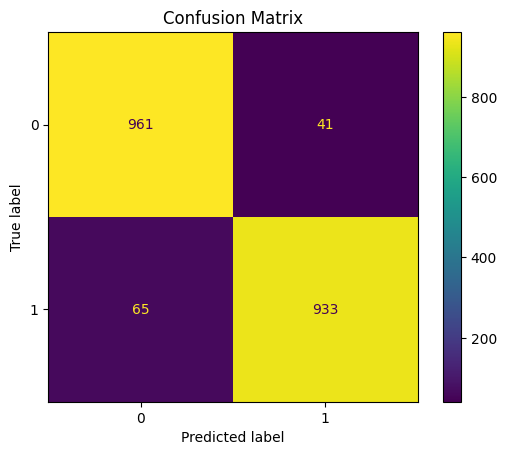

In [61]:
model = joblib.load("models/model_pipeline.pkl")

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()
